In [1]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
from collections import Counter

from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#data loading with pd.read_csv

data = pd.read_csv('C://Users//ppluc//Downloads//Dataset/h1n1_vaccine_prediction.csv')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
plt.rcParams['figure.figsize']=(15,8)

# EDA

In [5]:
data.shape

(26707, 34)

In [6]:
data.describe(include='object')

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
unique_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_worry,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_awareness,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
antiviral_medication,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
contact_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
bought_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
wash_hands_frequently,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
avoid_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [9]:
data.nunique()

unique_id                    26707
h1n1_worry                       4
h1n1_awareness                   3
antiviral_medication             2
contact_avoidance                2
bought_face_mask                 2
wash_hands_frequently            2
avoid_large_gatherings           2
reduced_outside_home_cont        2
avoid_touch_face                 2
dr_recc_h1n1_vacc                2
dr_recc_seasonal_vacc            2
chronic_medic_condition          2
cont_child_undr_6_mnths          2
is_health_worker                 2
has_health_insur                 2
is_h1n1_vacc_effective           5
is_h1n1_risky                    5
sick_from_h1n1_vacc              5
is_seas_vacc_effective           5
is_seas_risky                    5
sick_from_seas_vacc              5
age_bracket                      5
qualification                    4
race                             4
sex                              2
income_level                     3
marital_status                   2
housing_status      

In [10]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [11]:
# dropping unique_id column
data = data.drop('unique_id', axis=1)

In [12]:
independent = data.drop('h1n1_vaccine', axis=1)

In [13]:
dependent = data['h1n1_vaccine']

In [14]:
for i in independent.columns:
    independent[i] = independent[i].astype(str)

In [15]:
independent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   h1n1_worry                 26707 non-null  object
 1   h1n1_awareness             26707 non-null  object
 2   antiviral_medication       26707 non-null  object
 3   contact_avoidance          26707 non-null  object
 4   bought_face_mask           26707 non-null  object
 5   wash_hands_frequently      26707 non-null  object
 6   avoid_large_gatherings     26707 non-null  object
 7   reduced_outside_home_cont  26707 non-null  object
 8   avoid_touch_face           26707 non-null  object
 9   dr_recc_h1n1_vacc          26707 non-null  object
 10  dr_recc_seasonal_vacc      26707 non-null  object
 11  chronic_medic_condition    26707 non-null  object
 12  cont_child_undr_6_mnths    26707 non-null  object
 13  is_health_worker           26707 non-null  object
 14  has_he

In [16]:
for i in independent.columns:
    print(independent[i].unique())

['1.0' '3.0' '2.0' '0.0' 'nan']
['0.0' '2.0' '1.0' 'nan']
['0.0' '1.0' 'nan']
['0.0' '1.0' 'nan']
['0.0' '1.0' 'nan']
['0.0' '1.0' 'nan']
['0.0' '1.0' 'nan']
['1.0' '0.0' 'nan']
['1.0' '0.0' 'nan']
['0.0' 'nan' '1.0']
['0.0' 'nan' '1.0']
['0.0' '1.0' 'nan']
['0.0' '1.0' 'nan']
['0.0' '1.0' 'nan']
['1.0' 'nan' '0.0']
['3.0' '5.0' '4.0' '2.0' '1.0' 'nan']
['1.0' '4.0' '3.0' '2.0' '5.0' 'nan']
['2.0' '4.0' '1.0' '5.0' '3.0' 'nan']
['2.0' '4.0' '5.0' '3.0' '1.0' 'nan']
['1.0' '2.0' '4.0' '3.0' '5.0' 'nan']
['2.0' '4.0' '1.0' '5.0' 'nan' '3.0']
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'nan']
['White' 'Black' 'Other or Multiple' 'Hispanic']
['Female' 'Male']
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'nan']
['Not Married' 'Married' 'nan']
['Own' 'Rent' 'nan']
['Not in Labor Force' 'Employed' 'Unemployed' 'nan']
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
['0.0' '2.0

In [17]:
missing = pd.concat([independent.isin(['nan']).sum(), independent.isnull().sum()], axis=1, keys = ['nan_count', 'null value'])
missing

,nan_count,null value
h1n1_worry,92,0
h1n1_awareness,116,0
antiviral_medication,71,0
contact_avoidance,208,0
bought_face_mask,19,0
wash_hands_frequently,42,0
avoid_large_gatherings,87,0
reduced_outside_home_cont,82,0
avoid_touch_face,128,0
dr_recc_h1n1_vacc,2160,0


In [18]:
for i in independent.columns:
    independent[i] = independent[i].replace('nan', independent[i].mode()[0])

In [19]:
for i in independent.columns:
    print(independent[i].unique())

['1.0' '3.0' '2.0' '0.0']
['0.0' '2.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['1.0' '0.0']
['1.0' '0.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['1.0' '0.0']
['3.0' '5.0' '4.0' '2.0' '1.0']
['1.0' '4.0' '3.0' '2.0' '5.0']
['2.0' '4.0' '1.0' '5.0' '3.0']
['2.0' '4.0' '5.0' '3.0' '1.0']
['1.0' '2.0' '4.0' '3.0' '5.0']
['2.0' '4.0' '1.0' '5.0' '3.0']
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
['< 12 Years' '12 Years' 'College Graduate' 'Some College']
['White' 'Black' 'Other or Multiple' 'Hispanic']
['Female' 'Male']
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
['Not Married' 'Married']
['Own' 'Rent']
['Not in Labor Force' 'Employed' 'Unemployed']
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
['0.0' '2.0' '1.0' '3.0']
['0.0' '3.0' '2.0' '1.0']


<AxesSubplot:>

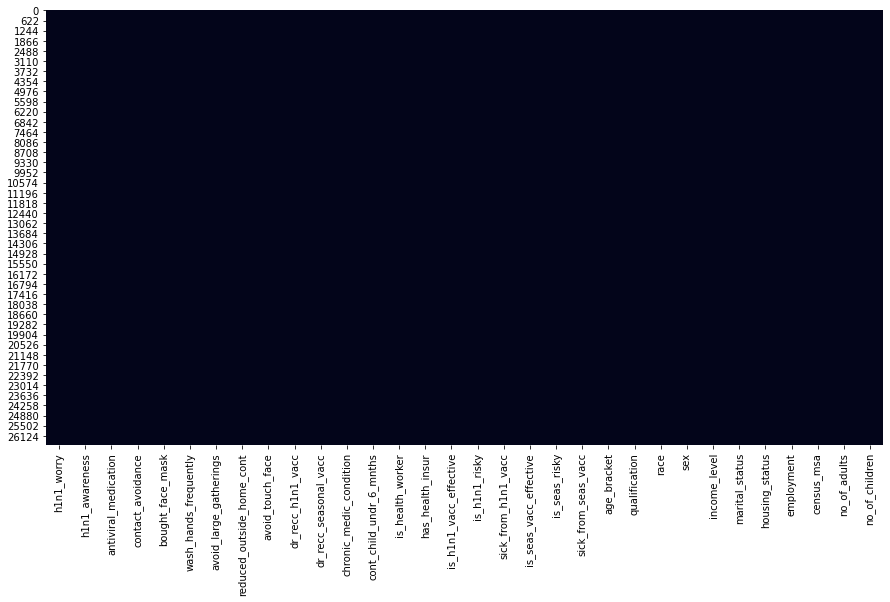

In [20]:
sns.heatmap(independent.isin(['nan']), cbar=False)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

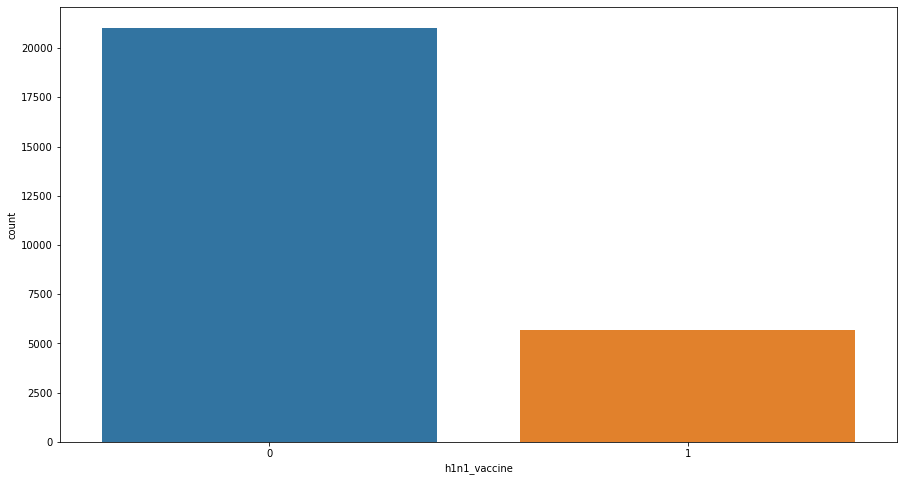

In [21]:
sns.countplot(dependent)

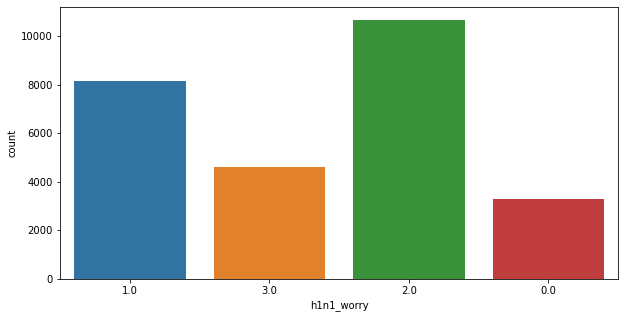

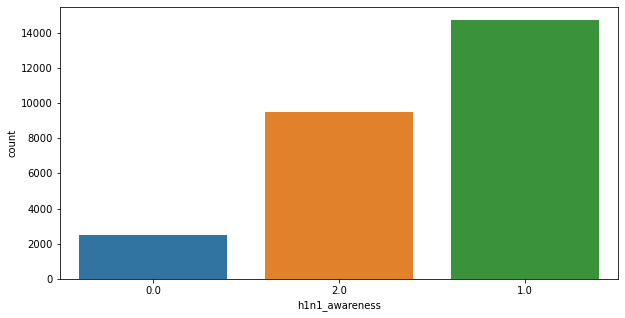

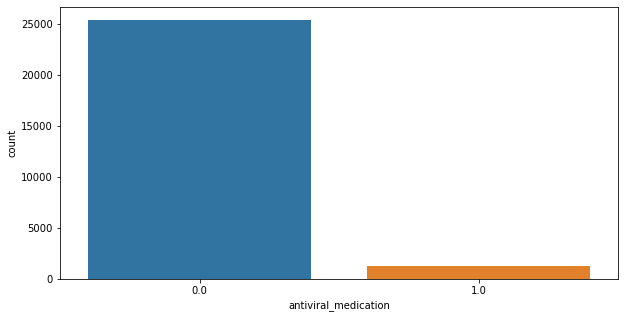

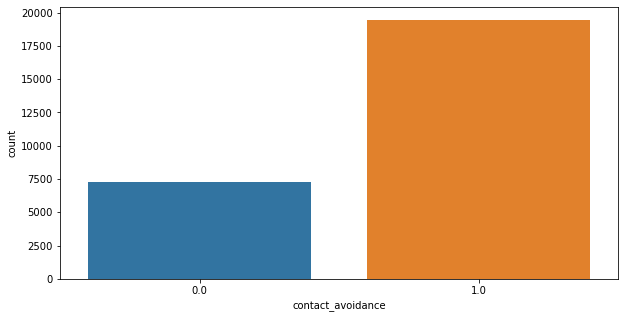

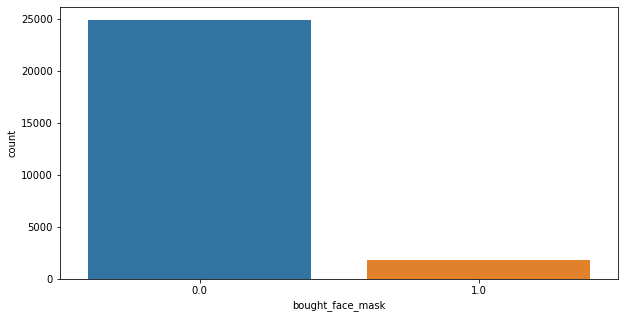

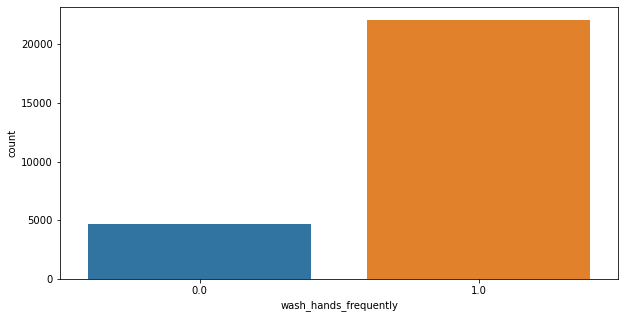

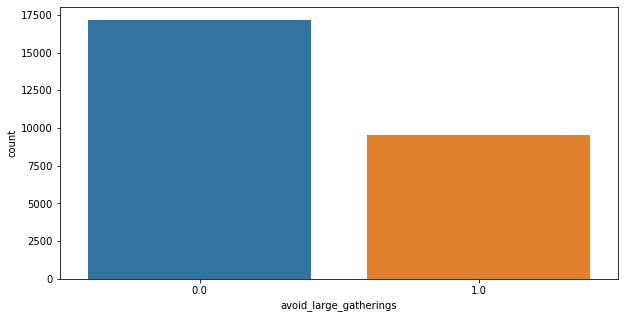

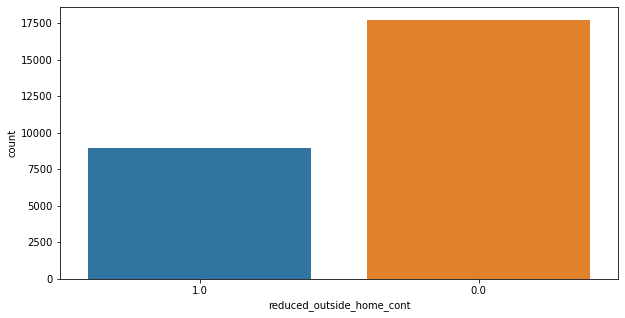

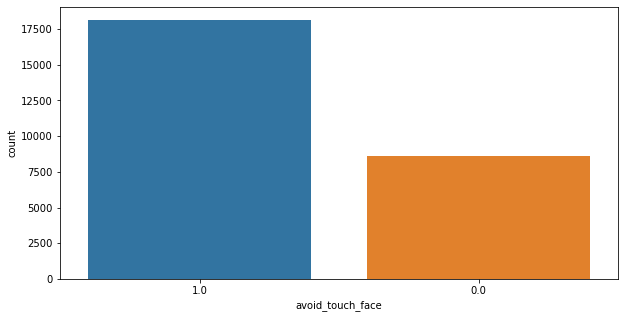

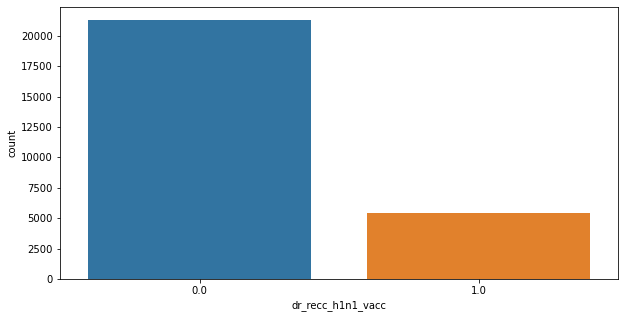

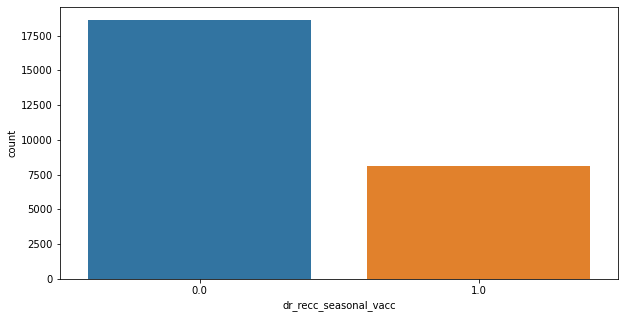

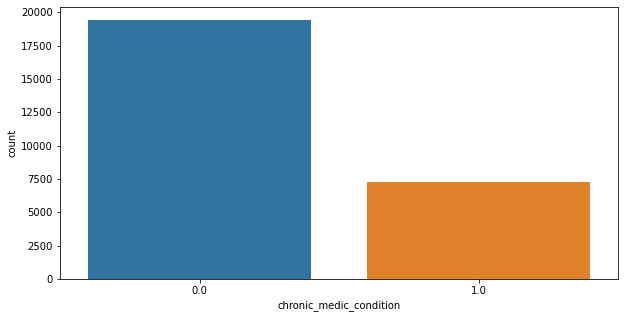

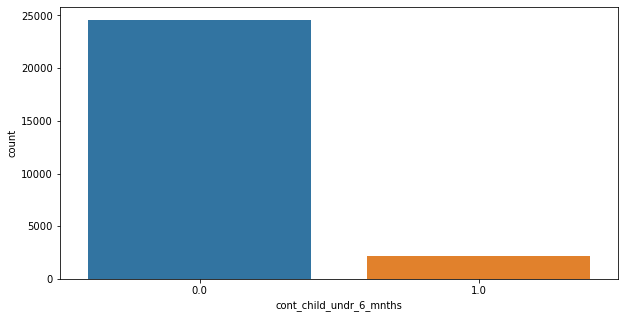

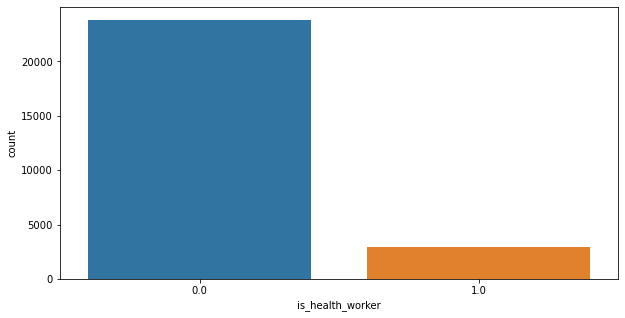

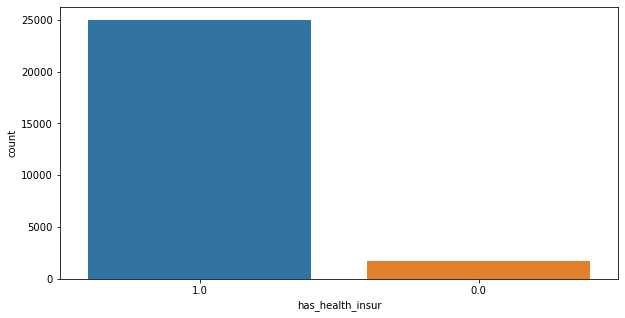

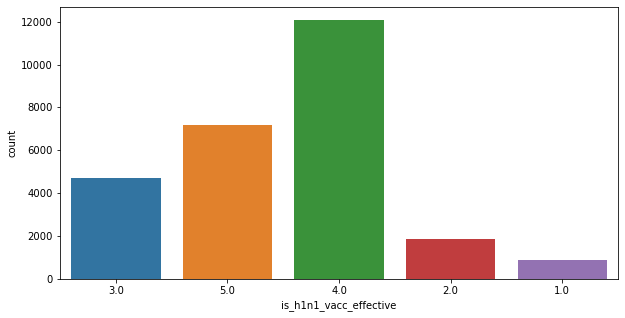

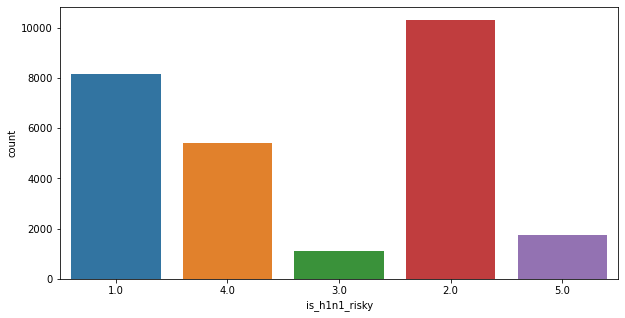

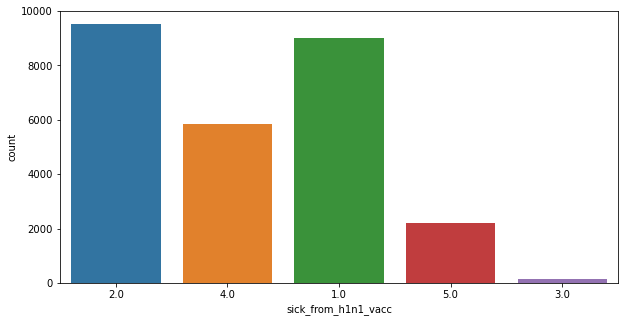

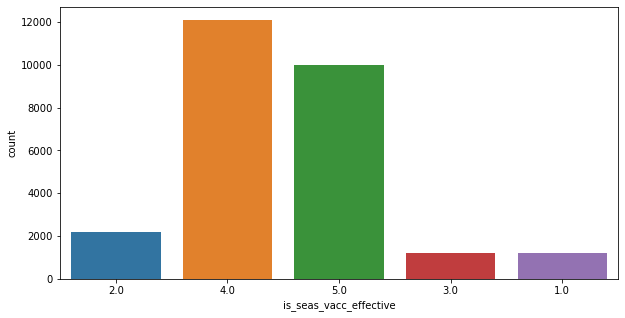

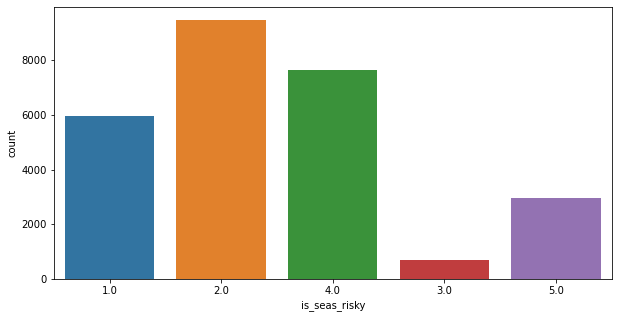

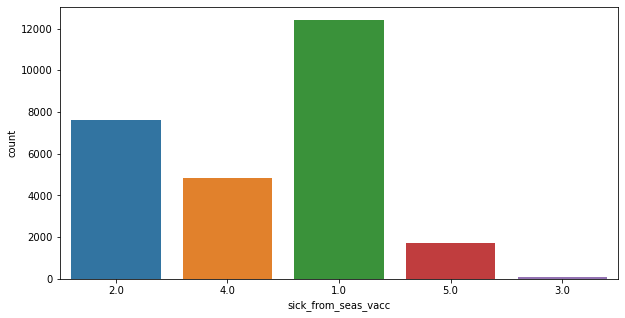

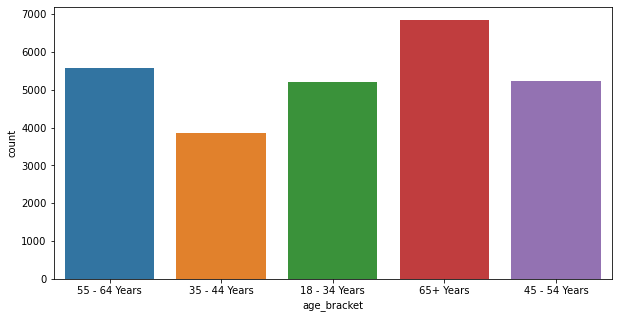

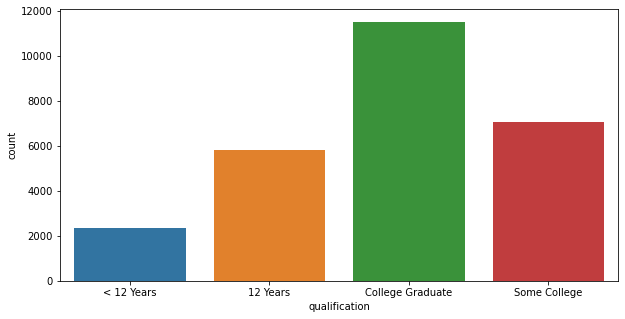

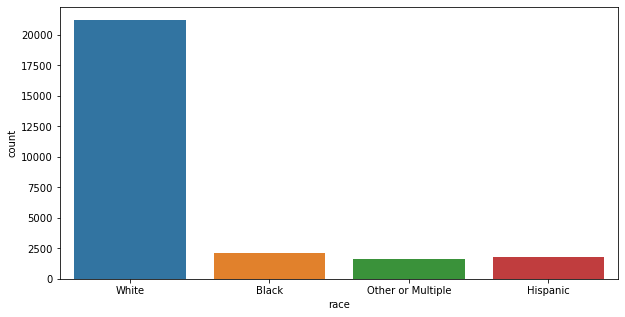

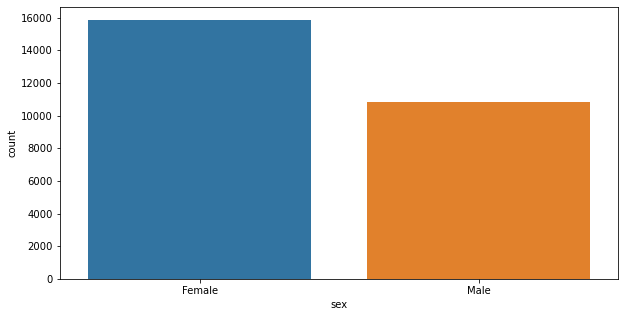

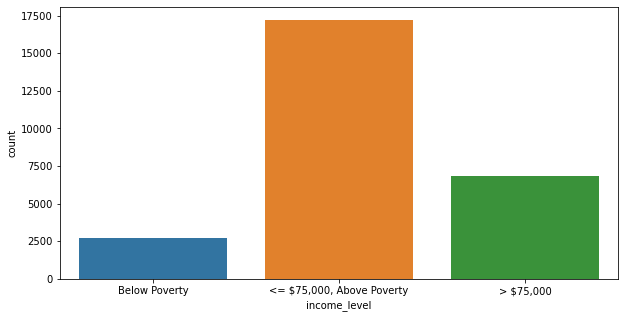

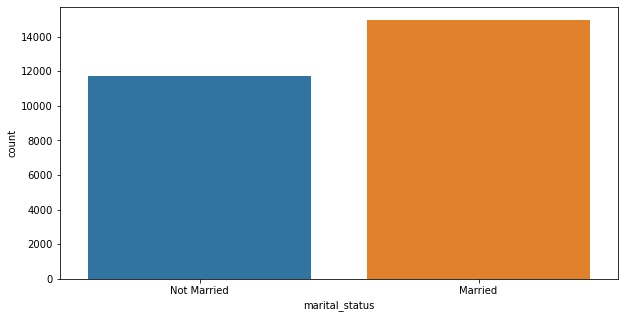

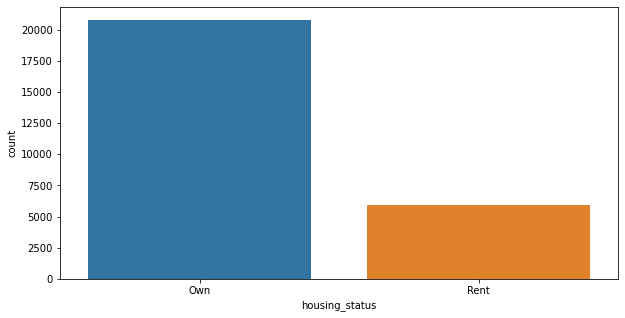

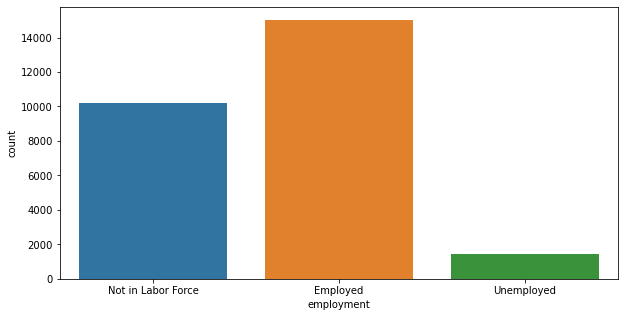

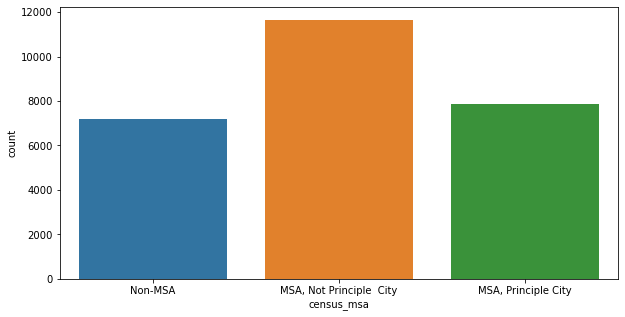

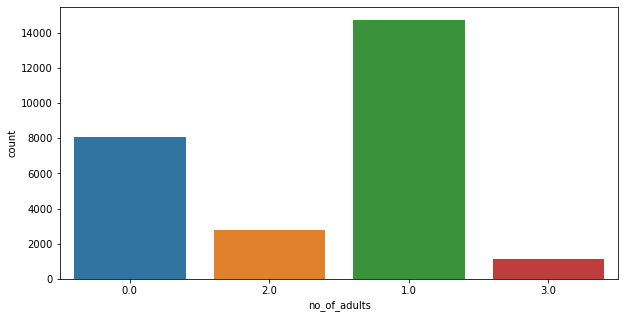

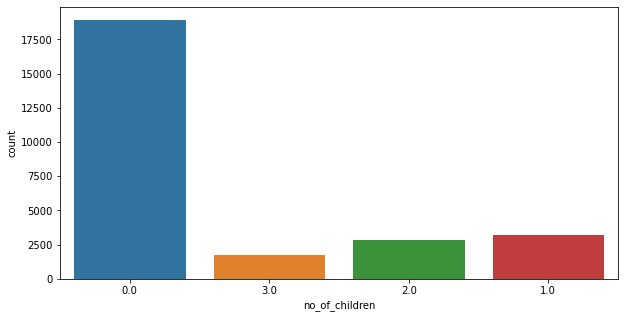

In [22]:
for i in independent.columns:
    plt.rcParams['figure.figsize'] = (10,5)
    sns.countplot(x= independent[i], )
    plt.show()

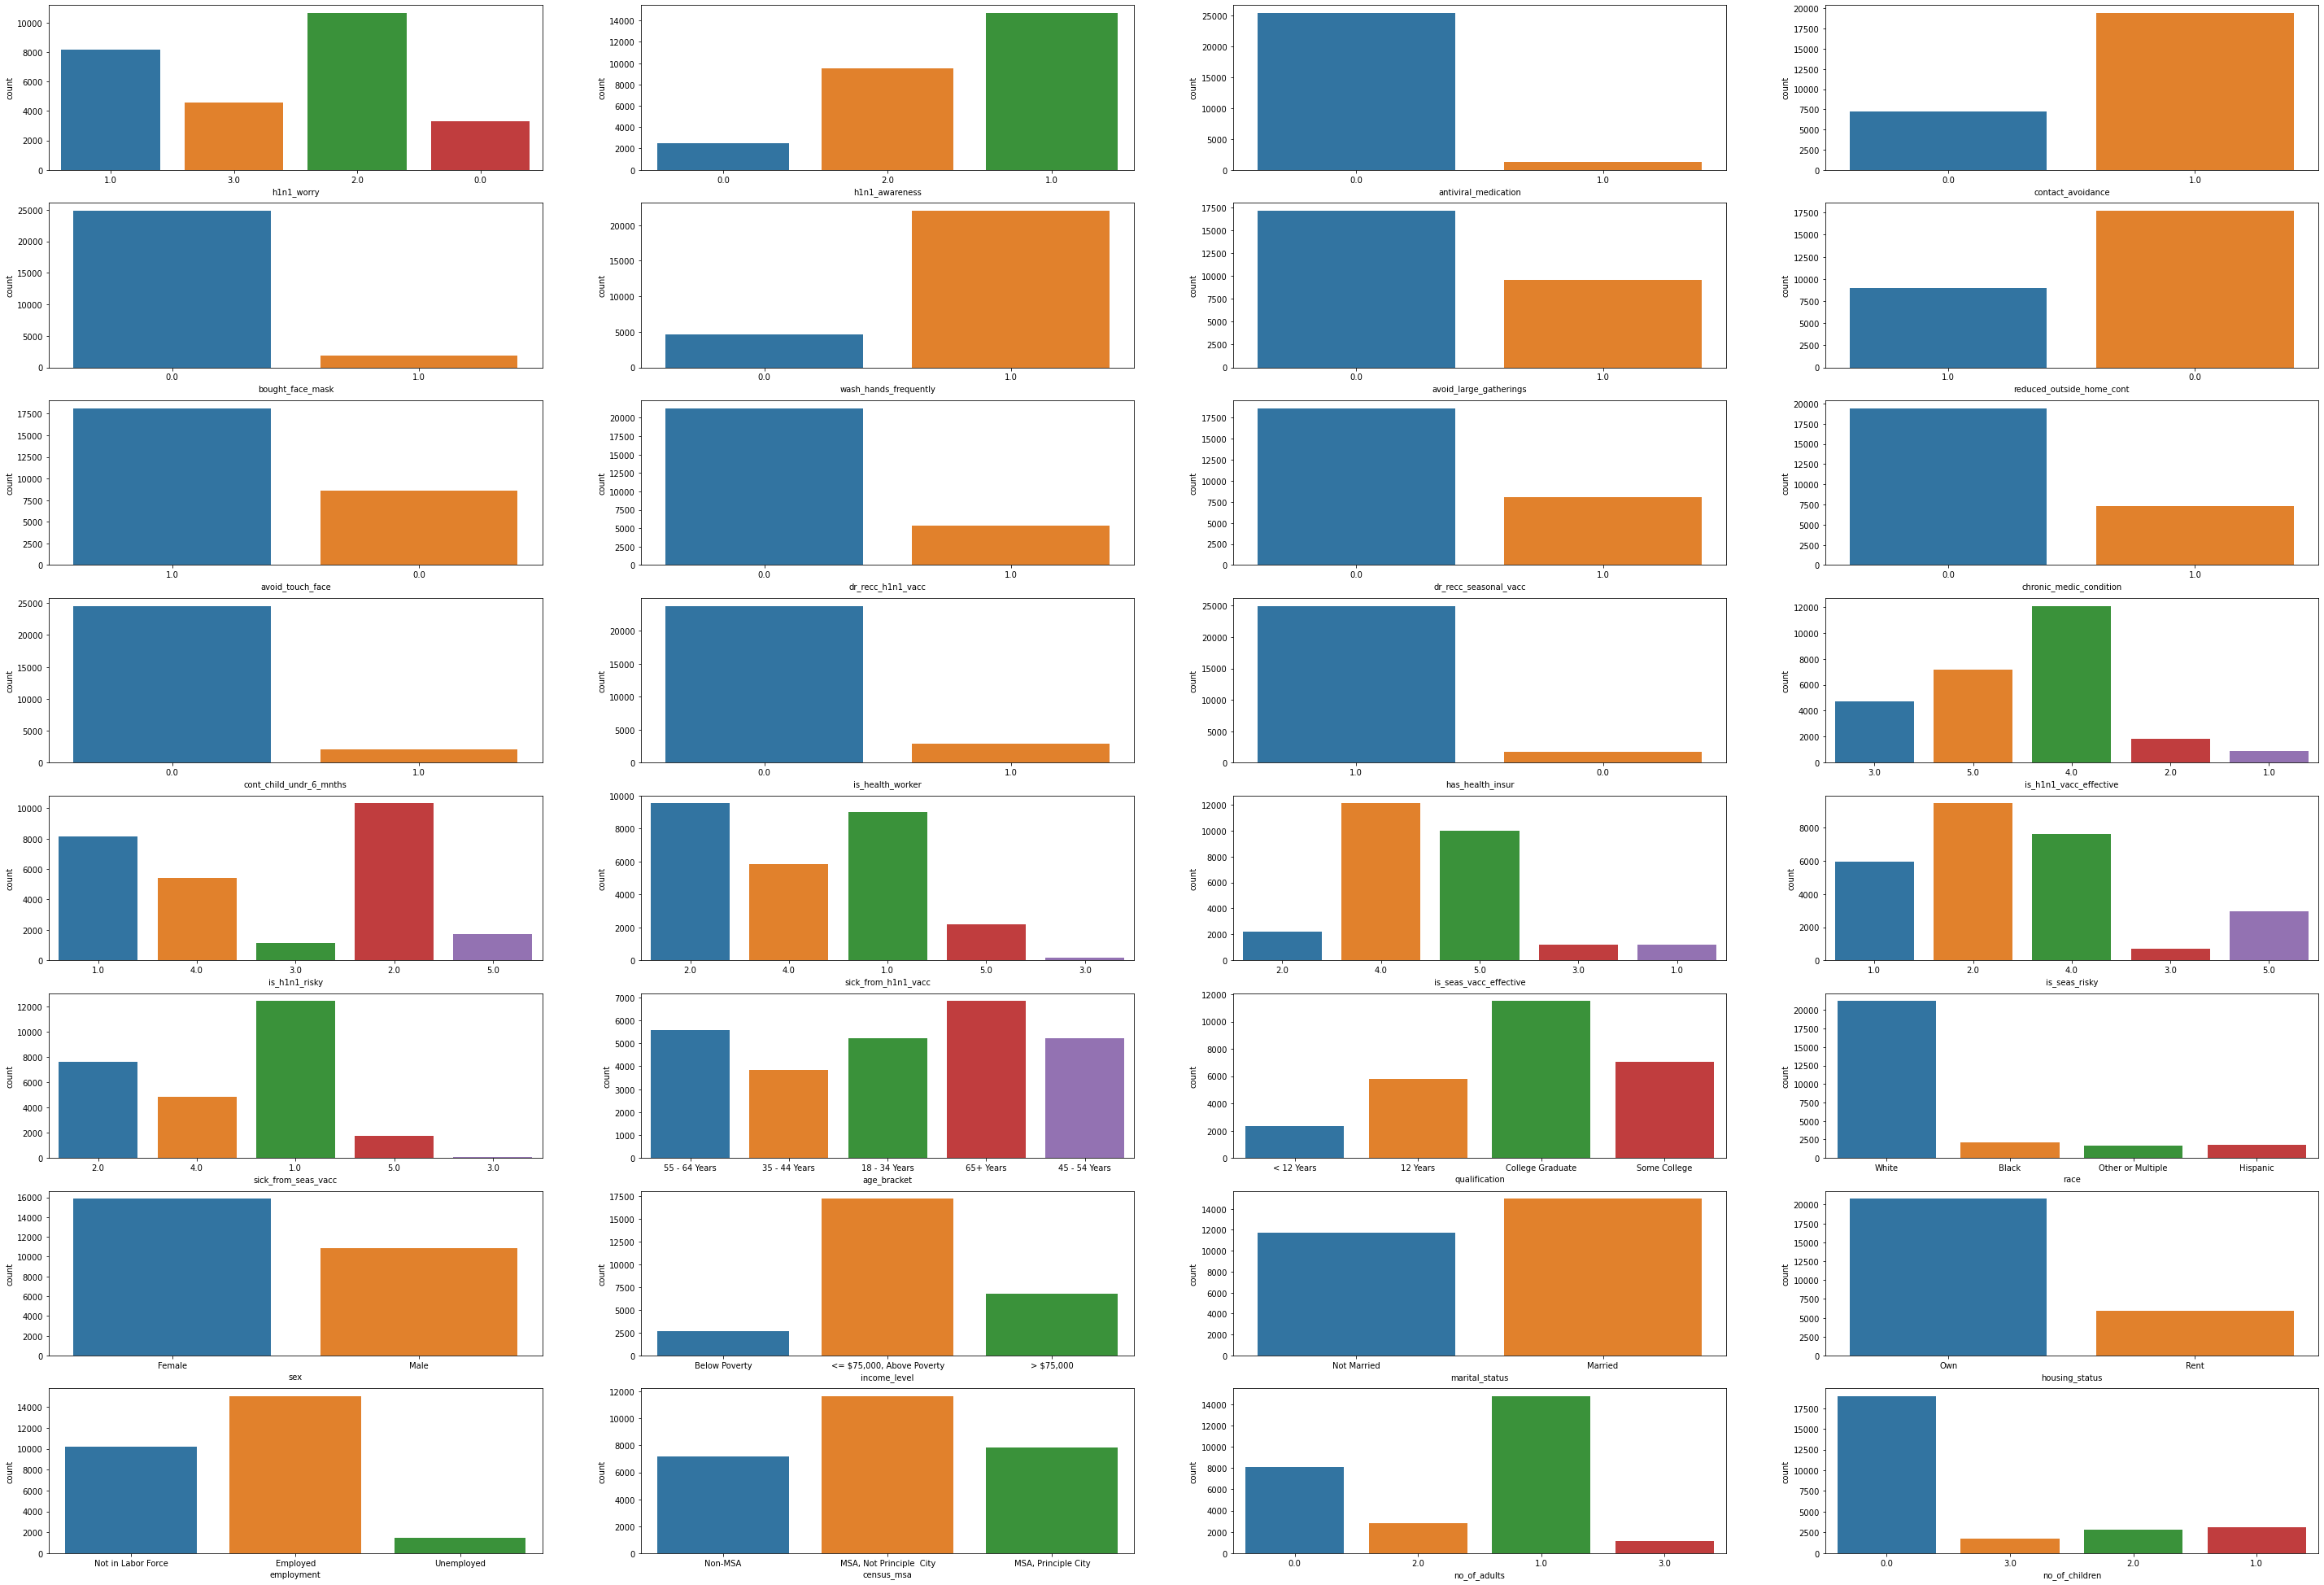

In [23]:
categorical = independent.columns

fig, ax = plt.subplots(8, 4, figsize=(50,35))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(independent[variable], ax=subplot)
plt.show()

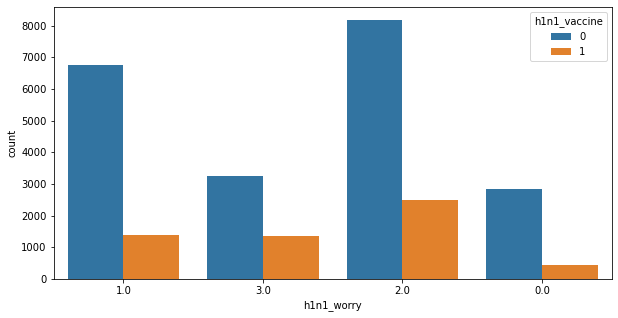

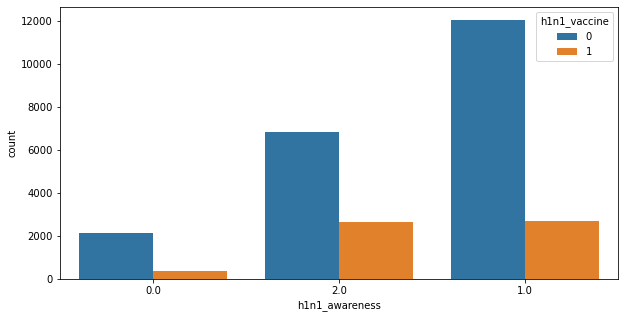

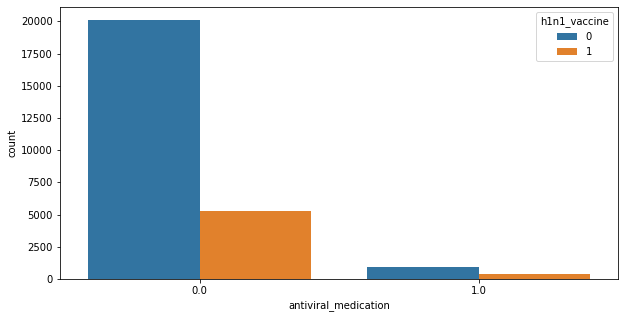

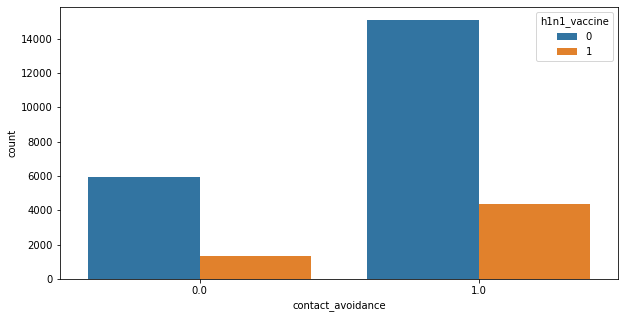

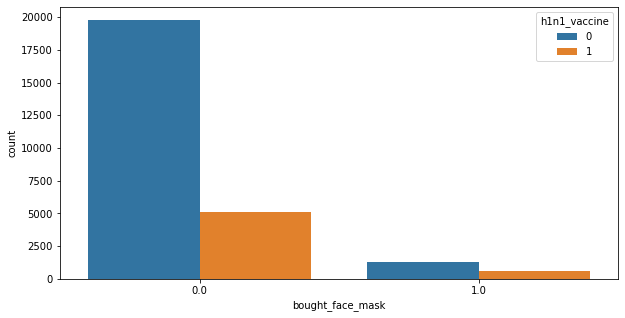

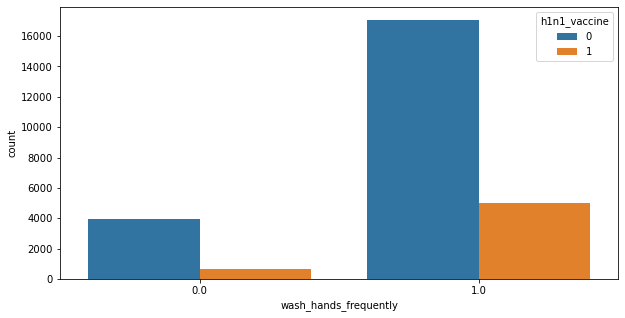

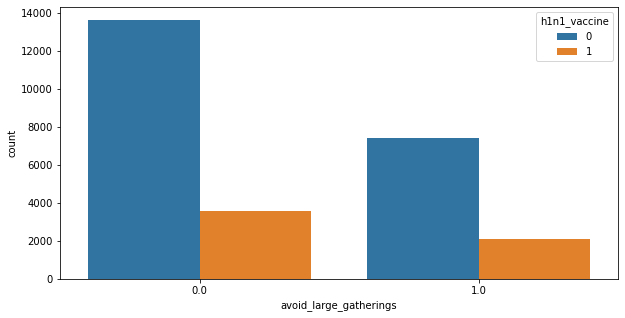

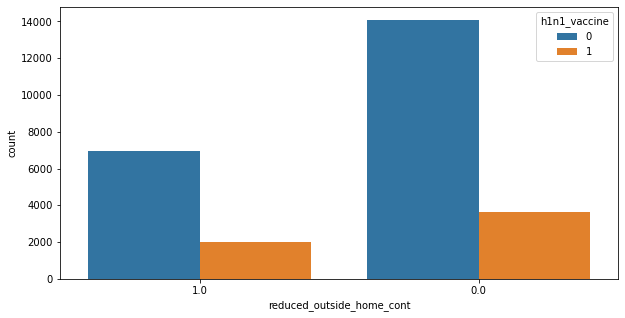

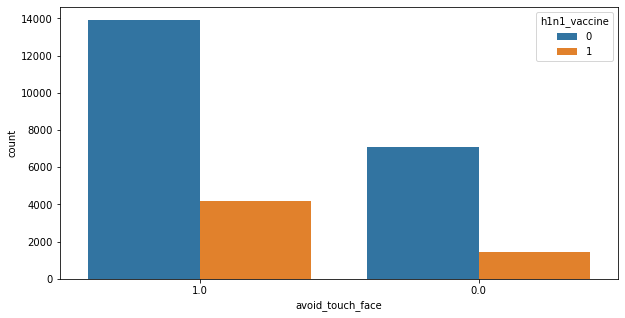

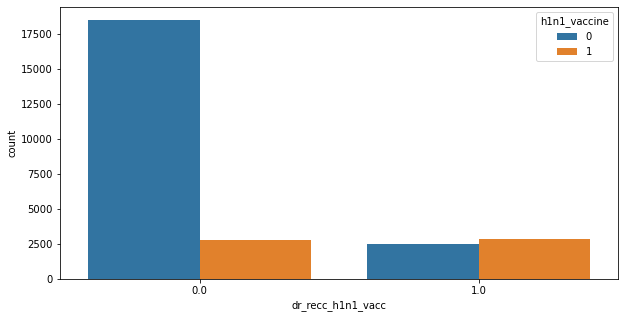

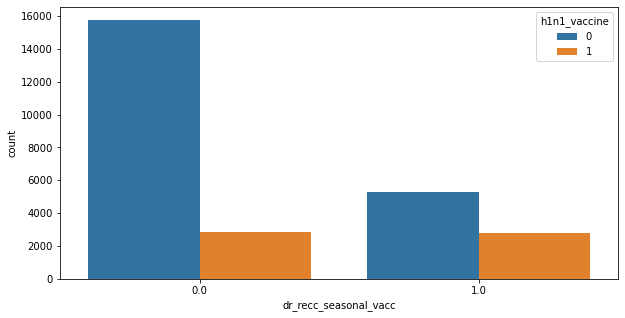

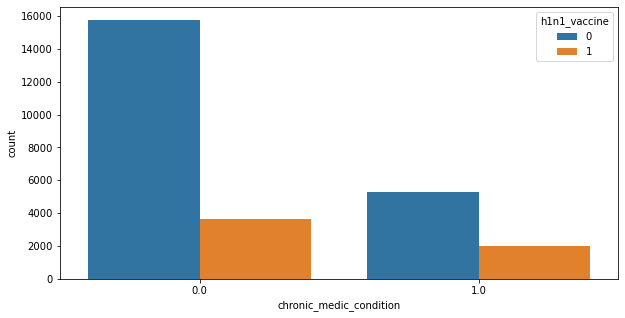

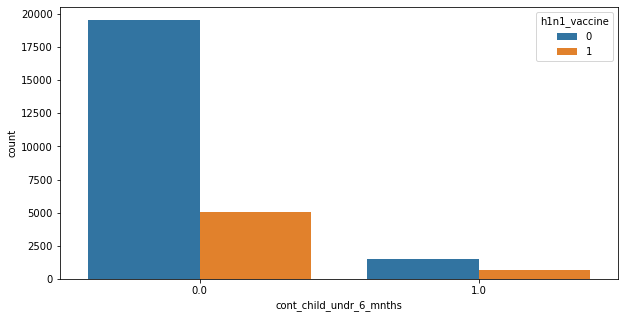

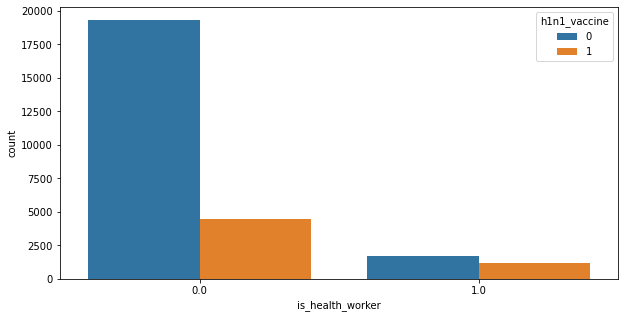

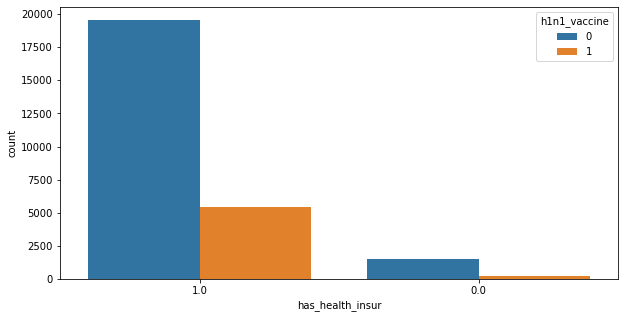

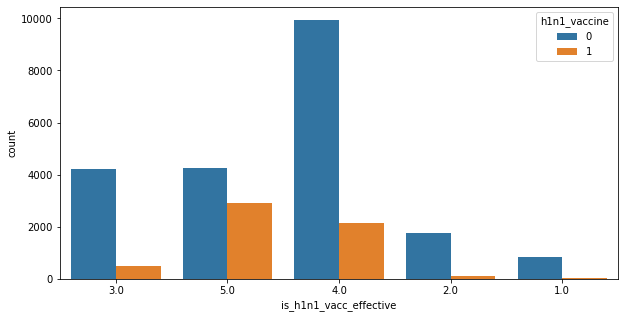

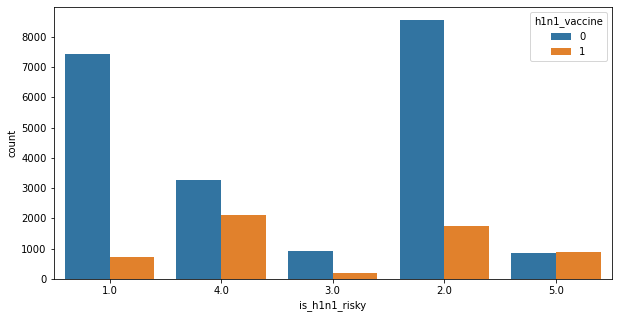

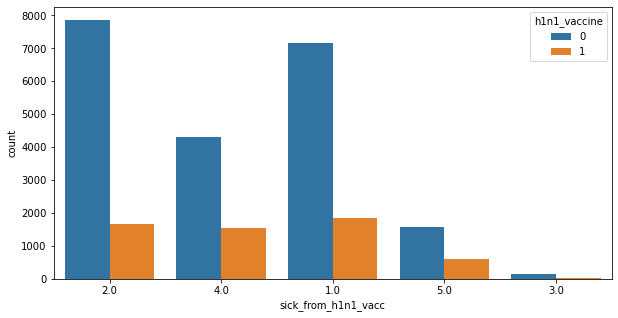

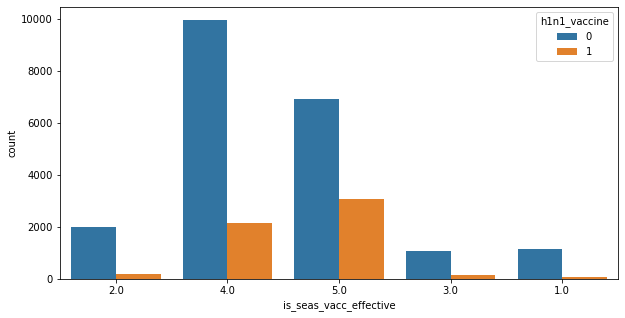

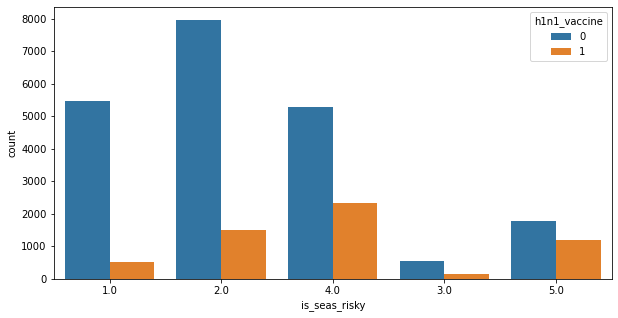

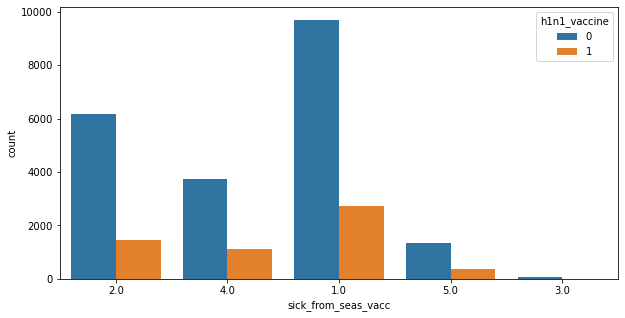

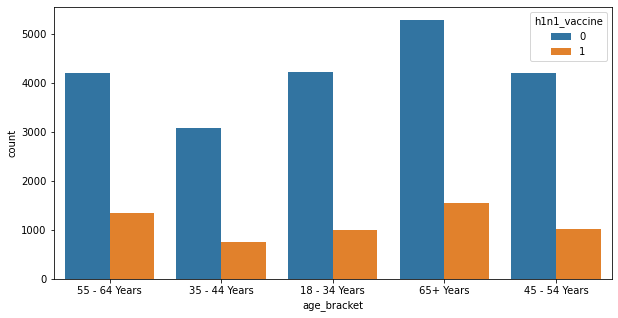

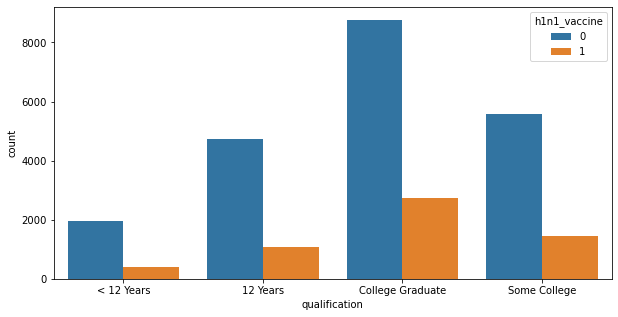

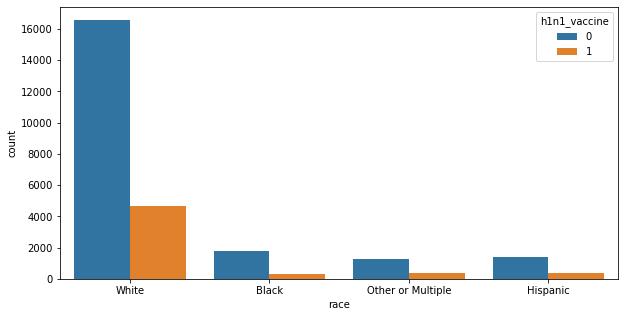

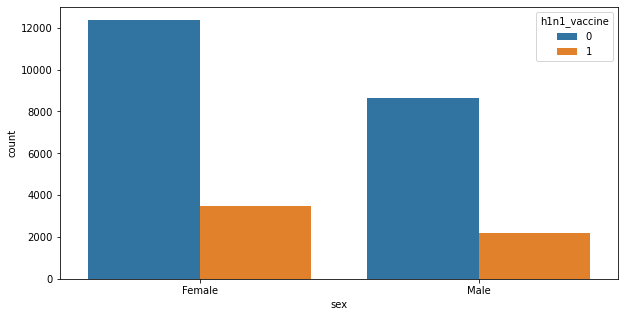

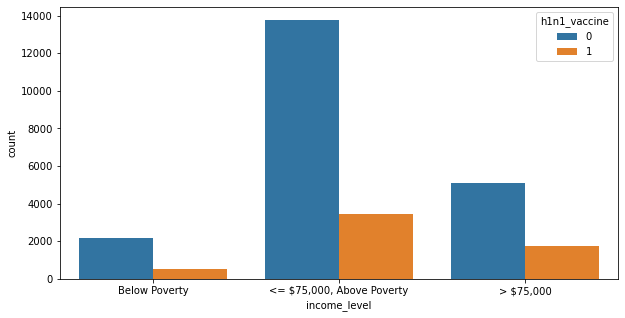

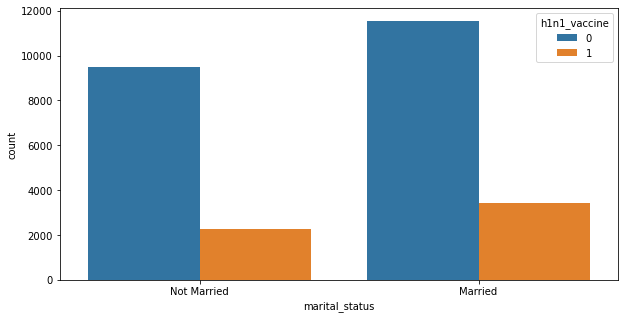

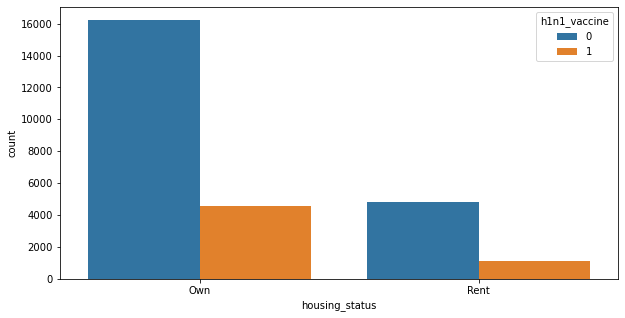

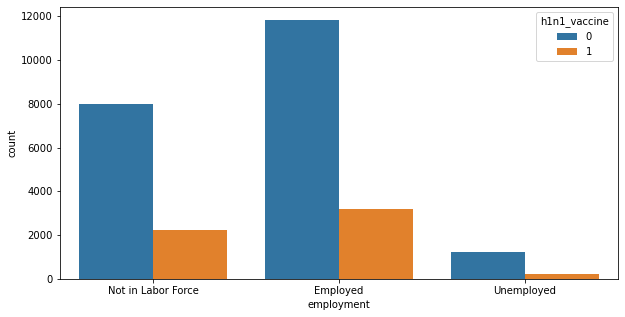

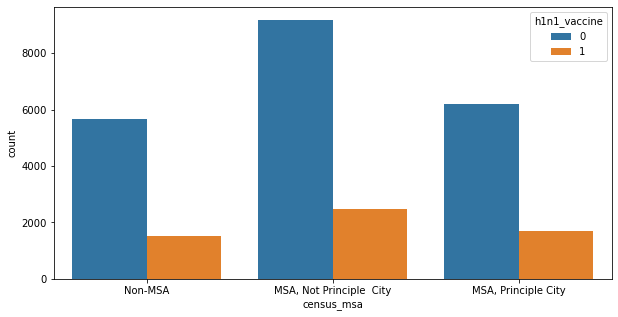

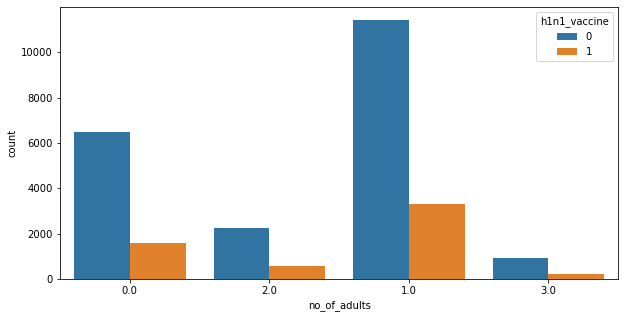

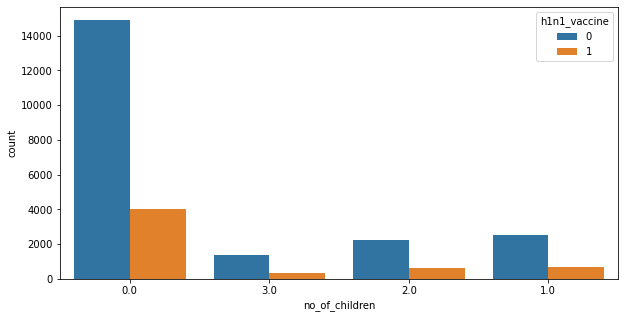

In [24]:
for i in independent.columns:
    plt.rcParams['figure.figsize'] = (10,5)
    sns.countplot(x = independent[i], hue=dependent)
    plt.show()

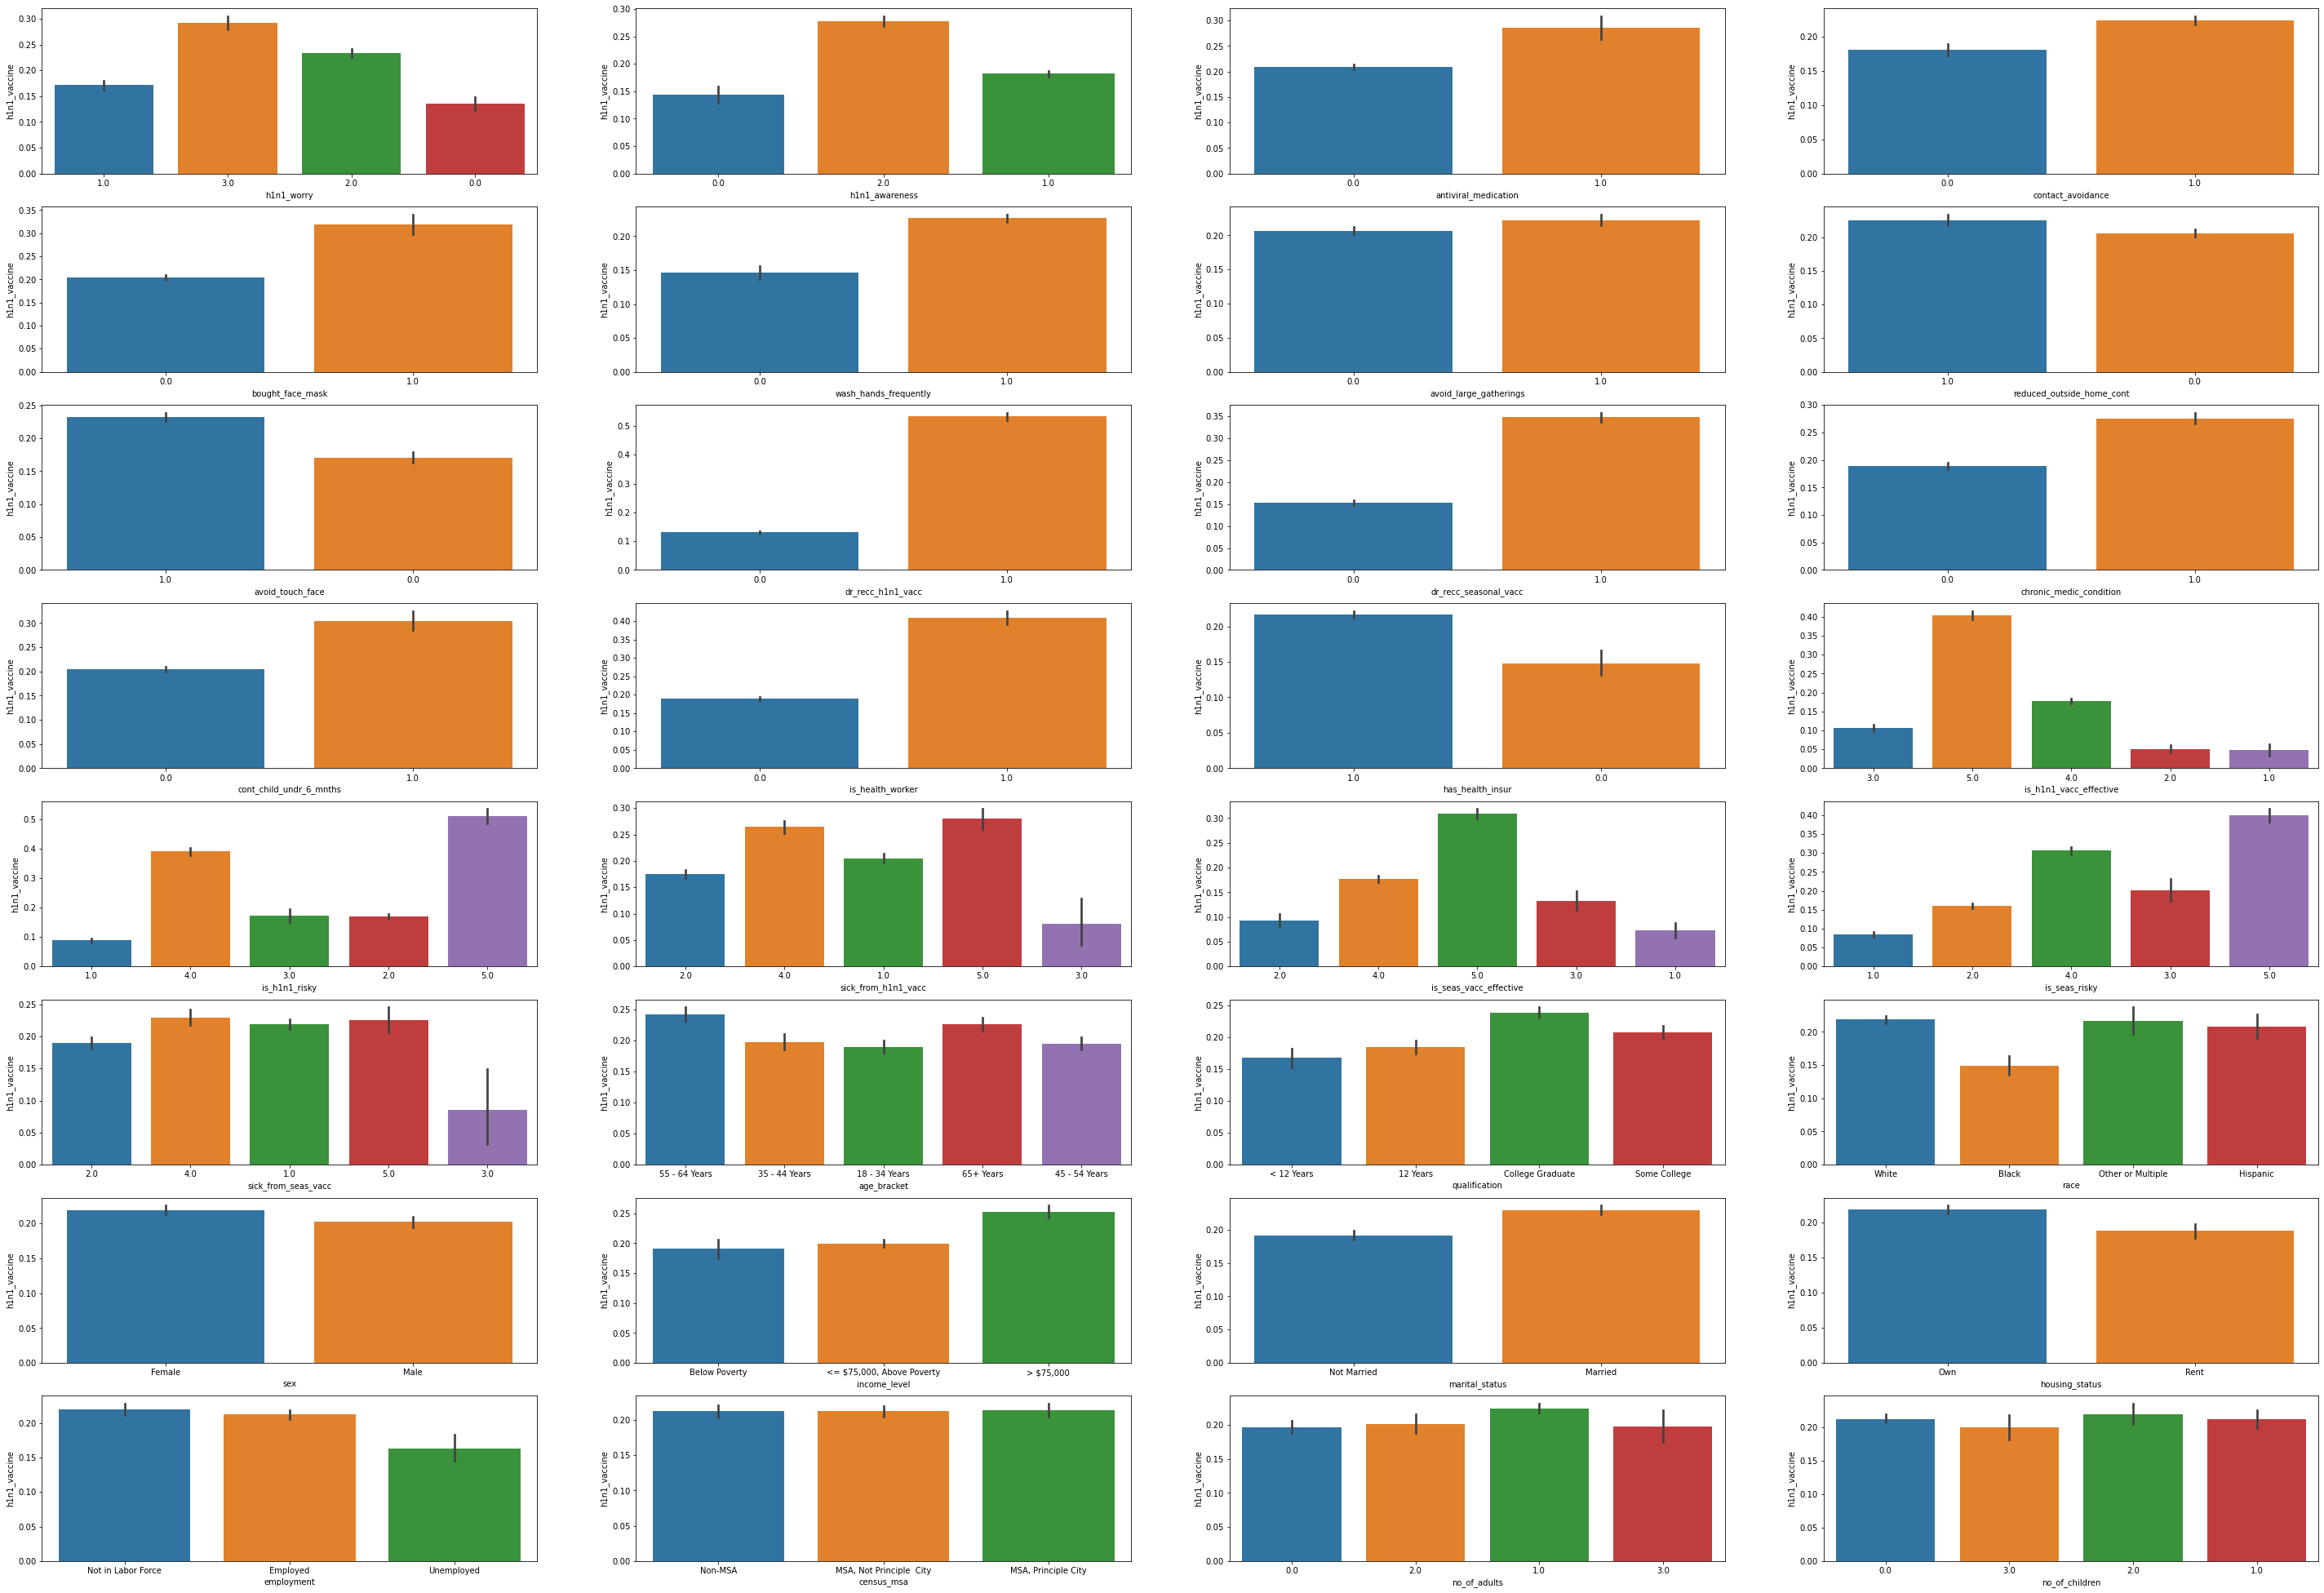

In [25]:
category = independent.columns
fig, ax = plt.subplots(8,4, figsize=(50,35))
for variable, subplot in zip(category, ax.flatten()):
    sns.barplot(x = independent[variable], y= dependent, ax=subplot)
plt.show()

In [26]:
dependent.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [27]:
print(sorted(Counter(dependent).items()))

[(0, 21033), (1, 5674)]


https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [28]:
independent_dummy = pd.get_dummies(independent, drop_first=True)

In [29]:
X = independent_dummy
y = dependent

# Over Sampling

In [30]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler(random_state=0)
X_resampled, y_resampled = random.fit_resample(X,y)

In [31]:
# of examples for each class
print(sorted(Counter(y_resampled).items()))

[(0, 21033), (1, 21033)]


## Splitting

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Logistic Regression Classifier Model

In [33]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

In [34]:
col = ['Model', 'Accuracy', 'Confusion Matrix', 'Classification Report']

result_tabulation = pd.DataFrame(columns=col)

def combine(y_pred, model_name):
    
    matrix = pd.Series({'Model': str(model_name),
                       'Accuracy': accuracy_score(y_test, y_pred),
                        'Confusion Matrix': confusion_matrix(y_test, y_pred),
                       'Classification Report': classification_report(y_test, y_pred),
                       })
    return matrix

In [35]:
result_tabulation = result_tabulation.append(combine(log_pred, 'Logistic Regression'), ignore_index=True)
result_tabulation

,Model,Accuracy,Confusion Matrix,Classification Report
0,Logistic Regression,0.761112,"[[3333, 875], [1135, 3071]]",precision recall f1-score ...


# ExtraTrees Classifier

In [36]:
etc = ExtraTreesClassifier()

In [37]:
etc.fit(X_train, y_train)

ExtraTreesClassifier()

In [38]:
etc_pred = etc.predict(X_test)

In [39]:
result_tabulation = result_tabulation.append(combine(etc_pred, 'Extra Trees Classifier'), ignore_index=True)
result_tabulation

,Model,Accuracy,Confusion Matrix,Classification Report
0,Logistic Regression,0.761112,"[[3333, 875], [1135, 3071]]",precision recall f1-score ...
1,Extra Trees Classifier,0.951628,"[[3936, 272], [135, 4071]]",precision recall f1-score ...


# SVC

In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [41]:
svc_pred = svc.predict(X_test)

In [42]:
classification_report(y_test, etc_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.94      0.95      4208\n           1       0.94      0.97      0.95      4206\n\n    accuracy                           0.95      8414\n   macro avg       0.95      0.95      0.95      8414\nweighted avg       0.95      0.95      0.95      8414\n'

In [43]:
result_tabulation = result_tabulation.append(combine(svc_pred, 'SVC'), ignore_index=True)
result_tabulation

,Model,Accuracy,Confusion Matrix,Classification Report
0,Logistic Regression,0.761112,"[[3333, 875], [1135, 3071]]",precision recall f1-score ...
1,Extra Trees Classifier,0.951628,"[[3936, 272], [135, 4071]]",precision recall f1-score ...
2,SVC,0.809960,"[[3451, 757], [842, 3364]]",precision recall f1-score ...


# Ada Boosting Classifier Model

In [44]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
abc_pred = abc.predict(X_test)

In [45]:
result_tabulation = result_tabulation.append(combine(abc_pred, 'AdaBoost Classifier'), ignore_index=True)
result_tabulation

,Model,Accuracy,Confusion Matrix,Classification Report
0,Logistic Regression,0.761112,"[[3333, 875], [1135, 3071]]",precision recall f1-score ...
1,Extra Trees Classifier,0.951628,"[[3936, 272], [135, 4071]]",precision recall f1-score ...
2,SVC,0.809960,"[[3451, 757], [842, 3364]]",precision recall f1-score ...
3,AdaBoost Classifier,0.757785,"[[3341, 867], [1171, 3035]]",precision recall f1-score ...


# Gradient Boosting Classifier Model

In [46]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

In [47]:
result_tabulation = result_tabulation.append(combine(gbc_pred, 'Gradient Boosting Classifier'), ignore_index=True)
result_tabulation

,Model,Accuracy,Confusion Matrix,Classification Report
0,Logistic Regression,0.761112,"[[3333, 875], [1135, 3071]]",precision recall f1-score ...
1,Extra Trees Classifier,0.951628,"[[3936, 272], [135, 4071]]",precision recall f1-score ...
2,SVC,0.809960,"[[3451, 757], [842, 3364]]",precision recall f1-score ...
3,AdaBoost Classifier,0.757785,"[[3341, 867], [1171, 3035]]",precision recall f1-score ...
4,Gradient Boosting Classifier,0.762776,"[[3342, 866], [1130, 3076]]",precision recall f1-score ...


# Random Forest Classifier Model

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [49]:
result_tabulation = result_tabulation.append(combine(rfc_pred, 'Random Forest Classifier'), ignore_index=True)
result_tabulation

,Model,Accuracy,Confusion Matrix,Classification Report
0,Logistic Regression,0.761112,"[[3333, 875], [1135, 3071]]",precision recall f1-score ...
1,Extra Trees Classifier,0.951628,"[[3936, 272], [135, 4071]]",precision recall f1-score ...
2,SVC,0.809960,"[[3451, 757], [842, 3364]]",precision recall f1-score ...
3,AdaBoost Classifier,0.757785,"[[3341, 867], [1171, 3035]]",precision recall f1-score ...
4,Gradient Boosting Classifier,0.762776,"[[3342, 866], [1130, 3076]]",precision recall f1-score ...
5,Random Forest Classifier,0.941645,"[[3825, 383], [108, 4098]]",precision recall f1-score ...


# SGD Classifier Model

In [50]:
sgd  = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

In [51]:
result_tabulation = result_tabulation.append(combine(sgd_pred, 'SGD Classifier'), ignore_index=True)
result_tabulation

,Model,Accuracy,Confusion Matrix,Classification Report
0,Logistic Regression,0.761112,"[[3333, 875], [1135, 3071]]",precision recall f1-score ...
1,Extra Trees Classifier,0.951628,"[[3936, 272], [135, 4071]]",precision recall f1-score ...
2,SVC,0.809960,"[[3451, 757], [842, 3364]]",precision recall f1-score ...
3,AdaBoost Classifier,0.757785,"[[3341, 867], [1171, 3035]]",precision recall f1-score ...
4,Gradient Boosting Classifier,0.762776,"[[3342, 866], [1130, 3076]]",precision recall f1-score ...
5,Random Forest Classifier,0.941645,"[[3825, 383], [108, 4098]]",precision recall f1-score ...
6,SGD Classifier,0.756358,"[[3305, 903], [1147, 3059]]",precision recall f1-score ...


# Decision Tree Classifier Model

In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

In [53]:
result_tabulation = result_tabulation.append(combine(dtc_pred, 'Decision Tree Classifier'), ignore_index=True)
result_tabulation

,Model,Accuracy,Confusion Matrix,Classification Report
0,Logistic Regression,0.761112,"[[3333, 875], [1135, 3071]]",precision recall f1-score ...
1,Extra Trees Classifier,0.951628,"[[3936, 272], [135, 4071]]",precision recall f1-score ...
2,SVC,0.809960,"[[3451, 757], [842, 3364]]",precision recall f1-score ...
3,AdaBoost Classifier,0.757785,"[[3341, 867], [1171, 3035]]",precision recall f1-score ...
4,Gradient Boosting Classifier,0.762776,"[[3342, 866], [1130, 3076]]",precision recall f1-score ...
5,Random Forest Classifier,0.941645,"[[3825, 383], [108, 4098]]",precision recall f1-score ...
6,SGD Classifier,0.756358,"[[3305, 903], [1147, 3059]]",precision recall f1-score ...
7,Decision Tree Classifier,0.897433,"[[3476, 732], [131, 4075]]",precision recall f1-score ...
